# Small Support Vector Machine tutorial: 
Needed packages sklearn   
                           SMA May 2023  
                           More info (and it has really detailed material): https://scikit-learn.org/stable/modules/svm.html     
                           https://scikit-learn.org/stable/modules/svm.html  
                           (The first part of the tutorial is a reproduction from a tutorial in XX website)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#This tutorial is done first with pandas for handling the CSV but the same thing can be done with numpu

In [2]:
bankdata = pd.read_csv("bill_authentication.csv")

In [3]:
bankdata.shape


(1372, 5)

In [4]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
print(bankdata)

      Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


SVM needs an array where the **X** is the samples and **Y** the features

In [6]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class'] #Saves in the y the type "the label"
#X = bankdata['Variance'] #Here it will use the variance to build the model

The following is a feature from sklearn that randomly can select a subset from the arrays for doing the training and the test 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state=1)


Now we need to import the SVM package from sklearn

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1097, 4), (1097,), (275, 4), (275,))

In [9]:
#from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear') #There are types of kernels:polynomial, "RBF"
#svclassifier.fit(x_train.reshape(-1,1),y_train)#Here we directly fit

In [27]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear') #There are types of kernels:polynomial, "RBF"
svclassifier.fit(X_train,y_train)#Here we directly fit

NameError: name 'LinearSVC' is not defined

In [11]:
y_pred = svclassifier.predict(X_test) #Here we predict new values that are outside the trainign data

We need a way to quantify how it perfomed and this is done already with sklearn

In [12]:
#print(svclassifier.score(x_test.reshape(-1,1),y_pred))
print(svclassifier.score(X_test,y_pred))

1.0


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[156   1]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Feature Selection and SVM-ANOVA (Step 2 variation)

(This is the first time I'm using it, so I need to understand first what does this thing do) https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html#sphx-glr-auto-examples-svm-plot-svm-anova-py

For more about feature selection: https://amueller.github.io/aml/05-advanced-topics/12-feature-selection.html

In [54]:
import numpy as np
from sklearn.datasets import load_iris #This is a standard database in ML for testing

X, y = load_iris(return_X_y=True)
#print(X) It has 4 entries that are relevant for the classification
# Add non-informative features
rng = np.random.RandomState(0)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36)))) #Add 36 more which are only random

In [55]:
print(X)

[[5.1        3.5        1.4        ... 1.1368679  0.0375796  1.23527099]
 [4.9        3.         1.4        ... 0.19219682 1.95291893 0.9373024 ]
 [4.7        3.2        1.3        ... 1.15231467 1.18408386 1.14450381]
 ...
 [6.5        3.         5.2        ... 0.8168546  1.4421851  1.87060082]
 [6.2        3.4        5.4        ... 0.20947559 0.22710621 0.83360661]
 [5.9        3.         5.1        ... 0.25893904 0.03081289 0.77348467]]


In sklearn you can creat pipelines where you are going to join different models. This can be also used for the NN

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [57]:
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator

clf = Pipeline(
    [
        ("anova", SelectPercentile(f_classif)), #This makes a feature selection
        ("scaler", StandardScaler()), #Normalizes the data, this is important
        #("svc", SVC(gamma="auto")),
        #("svc", SVC(kernel='linear')),
        ("svc", LinearSVC(max_iter=100000,tol=1e-5)),
    ]
)

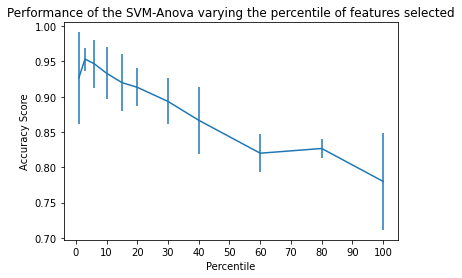

In [58]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)  #This performs training in subsets of our original data then we can see if it's overfitting
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

In [59]:
clf.set_params(anova__percentile=20)
this_scores = cross_val_score(clf, X, y)  #This performs training in subsets of our original data then we can see if it's overfitting
this_scores.mean()
this_scores.std()

0.02666666666666666

### Softness $S=wF_n+b$

In [60]:
clf.fit(X,y)

Pipeline(steps=[('anova', SelectPercentile(percentile=20)),
                ('scaler', StandardScaler()),
                ('svc', LinearSVC(max_iter=100000, tol=1e-05))])

In [61]:
print(clf[2])

LinearSVC(max_iter=100000, tol=1e-05)


In [66]:
w=clf[2].coef_

In [65]:
b=clf[2].intercept_

In [74]:
s=clf.decision_function(X)

In [53]:
#print(s)